<a href="https://colab.research.google.com/github/nyunu/study/blob/main/Hotel_Booking_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/데마분/train.csv")
test = pd.read_csv("/content/drive/MyDrive/데마분/test.csv")
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [ ]:
train.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
train.drop('Booking_ID', axis = 1, inplace = True)

- **categorical variable**

    : 'Booking_ID', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest',

<br>
       
- **numerical variable**
    
    : 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',  'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'no_of_previous_cancellations'

<br>

- **date variable**

    : 'arrival_year', 'arrival_month', 'arrival_date'

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          25392 non-null  int64  
 1   no_of_children                        25392 non-null  int64  
 2   no_of_weekend_nights                  25392 non-null  int64  
 3   no_of_week_nights                     25392 non-null  int64  
 4   type_of_meal_plan                     25392 non-null  object 
 5   required_car_parking_space            25392 non-null  int64  
 6   room_type_reserved                    25392 non-null  object 
 7   lead_time                             25392 non-null  int64  
 8   arrival_year                          25392 non-null  int64  
 9   arrival_month                         25392 non-null  int64  
 10  arrival_date                          25392 non-null  int64  
 11  market_segment_

In [ ]:
len(train.columns)

18

## **데이터 탐색 과정**

### **(1) 이상치 및 결측치 여부 확인**

#### **결측치**

In [ ]:
train.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### **이상치**

In [ ]:
train['booking_status'].value_counts()

Not_Canceled    17114
Canceled         8278
Name: booking_status, dtype: int64

In [ ]:
train['type_of_meal_plan'].value_counts()

Meal Plan 1     19492
Not Selected     3560
Meal Plan 2      2338
Meal Plan 3         2
Name: type_of_meal_plan, dtype: int64

In [ ]:
train['room_type_reserved'].value_counts()

Room_Type 1    19684
Room_Type 4     4242
Room_Type 6      667
Room_Type 2      498
Room_Type 5      186
Room_Type 7      111
Room_Type 3        4
Name: room_type_reserved, dtype: int64

In [ ]:
train['market_segment_type'].value_counts()

Online           16210
Offline           7398
Corporate         1427
Complementary      272
Aviation            85
Name: market_segment_type, dtype: int64

In [ ]:
train['required_car_parking_space'].value_counts()

0    24596
1      796
Name: required_car_parking_space, dtype: int64

In [ ]:
train['arrival_year'].value_counts()

2018    20808
2017     4584
Name: arrival_year, dtype: int64

In [ ]:
train['arrival_month'].value_counts()

10    3736
9     3249
8     2644
6     2261
11    2087
12    2076
7     2075
4     1922
5     1835
3     1616
2     1194
1      697
Name: arrival_month, dtype: int64

In [ ]:
train['arrival_date'].value_counts()

19    943
17    940
13    937
4     932
2     910
18    909
15    906
6     901
16    899
20    875
14    863
29    847
30    837
12    831
5     826
8     823
21    810
25    809
9     807
28    789
1     789
26    786
7     779
24    778
27    771
10    769
11    766
3     739
22    737
23    683
31    401
Name: arrival_date, dtype: int64

In [ ]:
train['no_of_children'].value_counts()

0     23502
1      1137
2       739
3        12
10        1
9         1
Name: no_of_children, dtype: int64

In [ ]:
train['repeated_guest'].value_counts()

0    24753
1      639
Name: repeated_guest, dtype: int64

In [ ]:
# 이상치 함수
def detect_outliers(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1

    boundary=1.5*iqr

    index1=df[df[columns] > q3+boundary].index
    index2=df[df[columns] < q1-boundary].index

    print(f"q3 = {q3}")
    print(f"q1 = {q1}")
    print(f"the number of outliers = ",
          len(index1)+len(index2))
    return

In [ ]:
detect_outliers(train, 'no_of_adults')

q3 = 2.0
q1 = 2.0
the number of outliers =  7114


In [ ]:
detect_outliers(train, 'no_of_children')

q3 = 0.0
q1 = 0.0
the number of outliers =  1890


In [ ]:
detect_outliers(train, 'no_of_weekend_nights')

q3 = 2.0
q1 = 0.0
the number of outliers =  11


In [ ]:
detect_outliers(train, 'no_of_week_nights')

q3 = 3.0
q1 = 1.0
the number of outliers =  207


In [ ]:
detect_outliers(train, 'no_of_previous_cancellations')

q3 = 0.0
q1 = 0.0
the number of outliers =  233


In [ ]:
detect_outliers(train, 'lead_time')

q3 = 127.0
q1 = 17.0
the number of outliers =  833


In [ ]:
detect_outliers(train, 'no_of_previous_bookings_not_canceled')

q3 = 0.0
q1 = 0.0
the number of outliers =  567


In [ ]:
detect_outliers(train, 'avg_price_per_room')

q3 = 120.15
q1 = 80.75
the number of outliers =  1184


In [ ]:
detect_outliers(train, 'no_of_special_requests')

q3 = 1.0
q1 = 0.0
the number of outliers =  536


### **(2) 데이터 분포 확인**

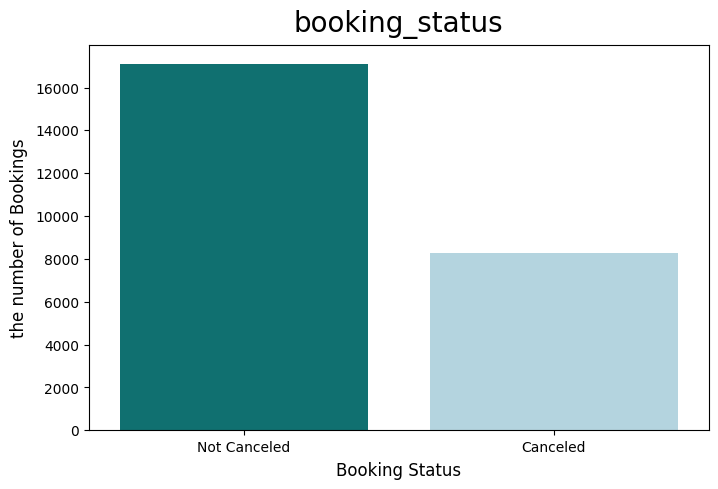

In [ ]:
# Visualizing the percentage of canceled vs not canceled bookings:
plt.figure(figsize=(8,5))
plt.title("booking_status", fontsize = 20, pad = 10)
sns.barplot(x=train['booking_status'].unique(), y=train['booking_status'].value_counts(), palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("the number of Bookings", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

In [ ]:
train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
train_nu = train[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]

In [ ]:
train_cat = train.drop(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'], axis = 1)

<ipython-input-191-fd03db270be4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_nu[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
<ipython-input-191-fd03db270be4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_nu[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])
<ipython-input-1

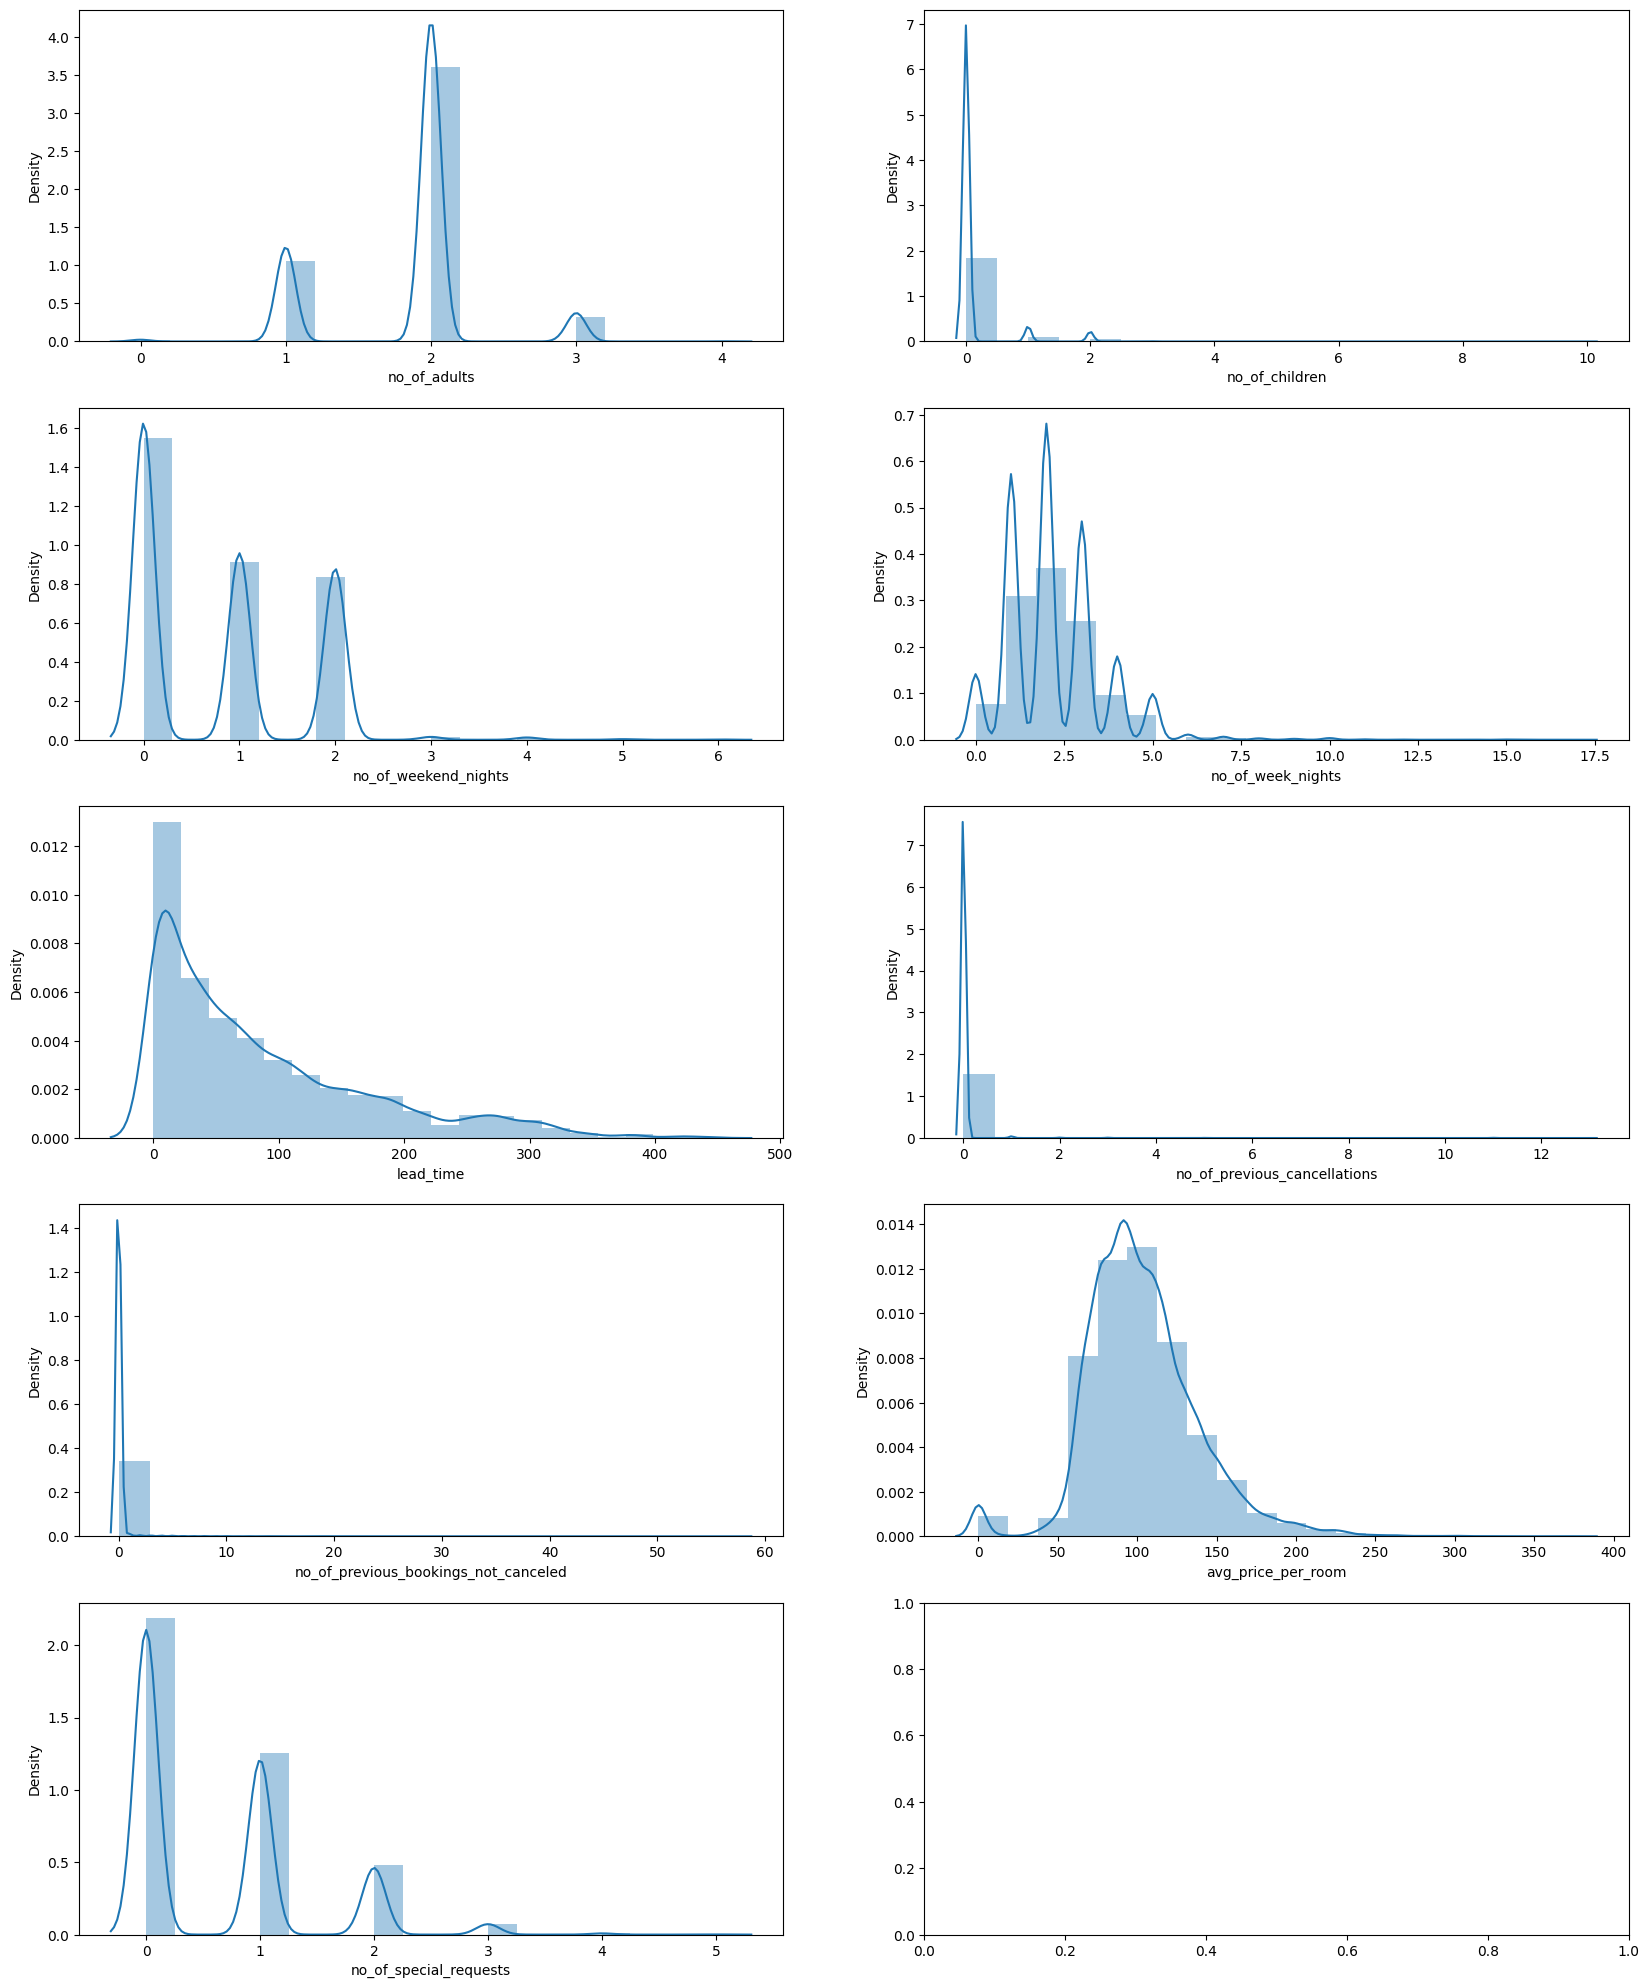

In [ ]:
col_n = 2
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(train_nu.columns[:]):
    sns.distplot(train_nu[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

In [ ]:
train_cat.columns

Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest'],
      dtype='object')

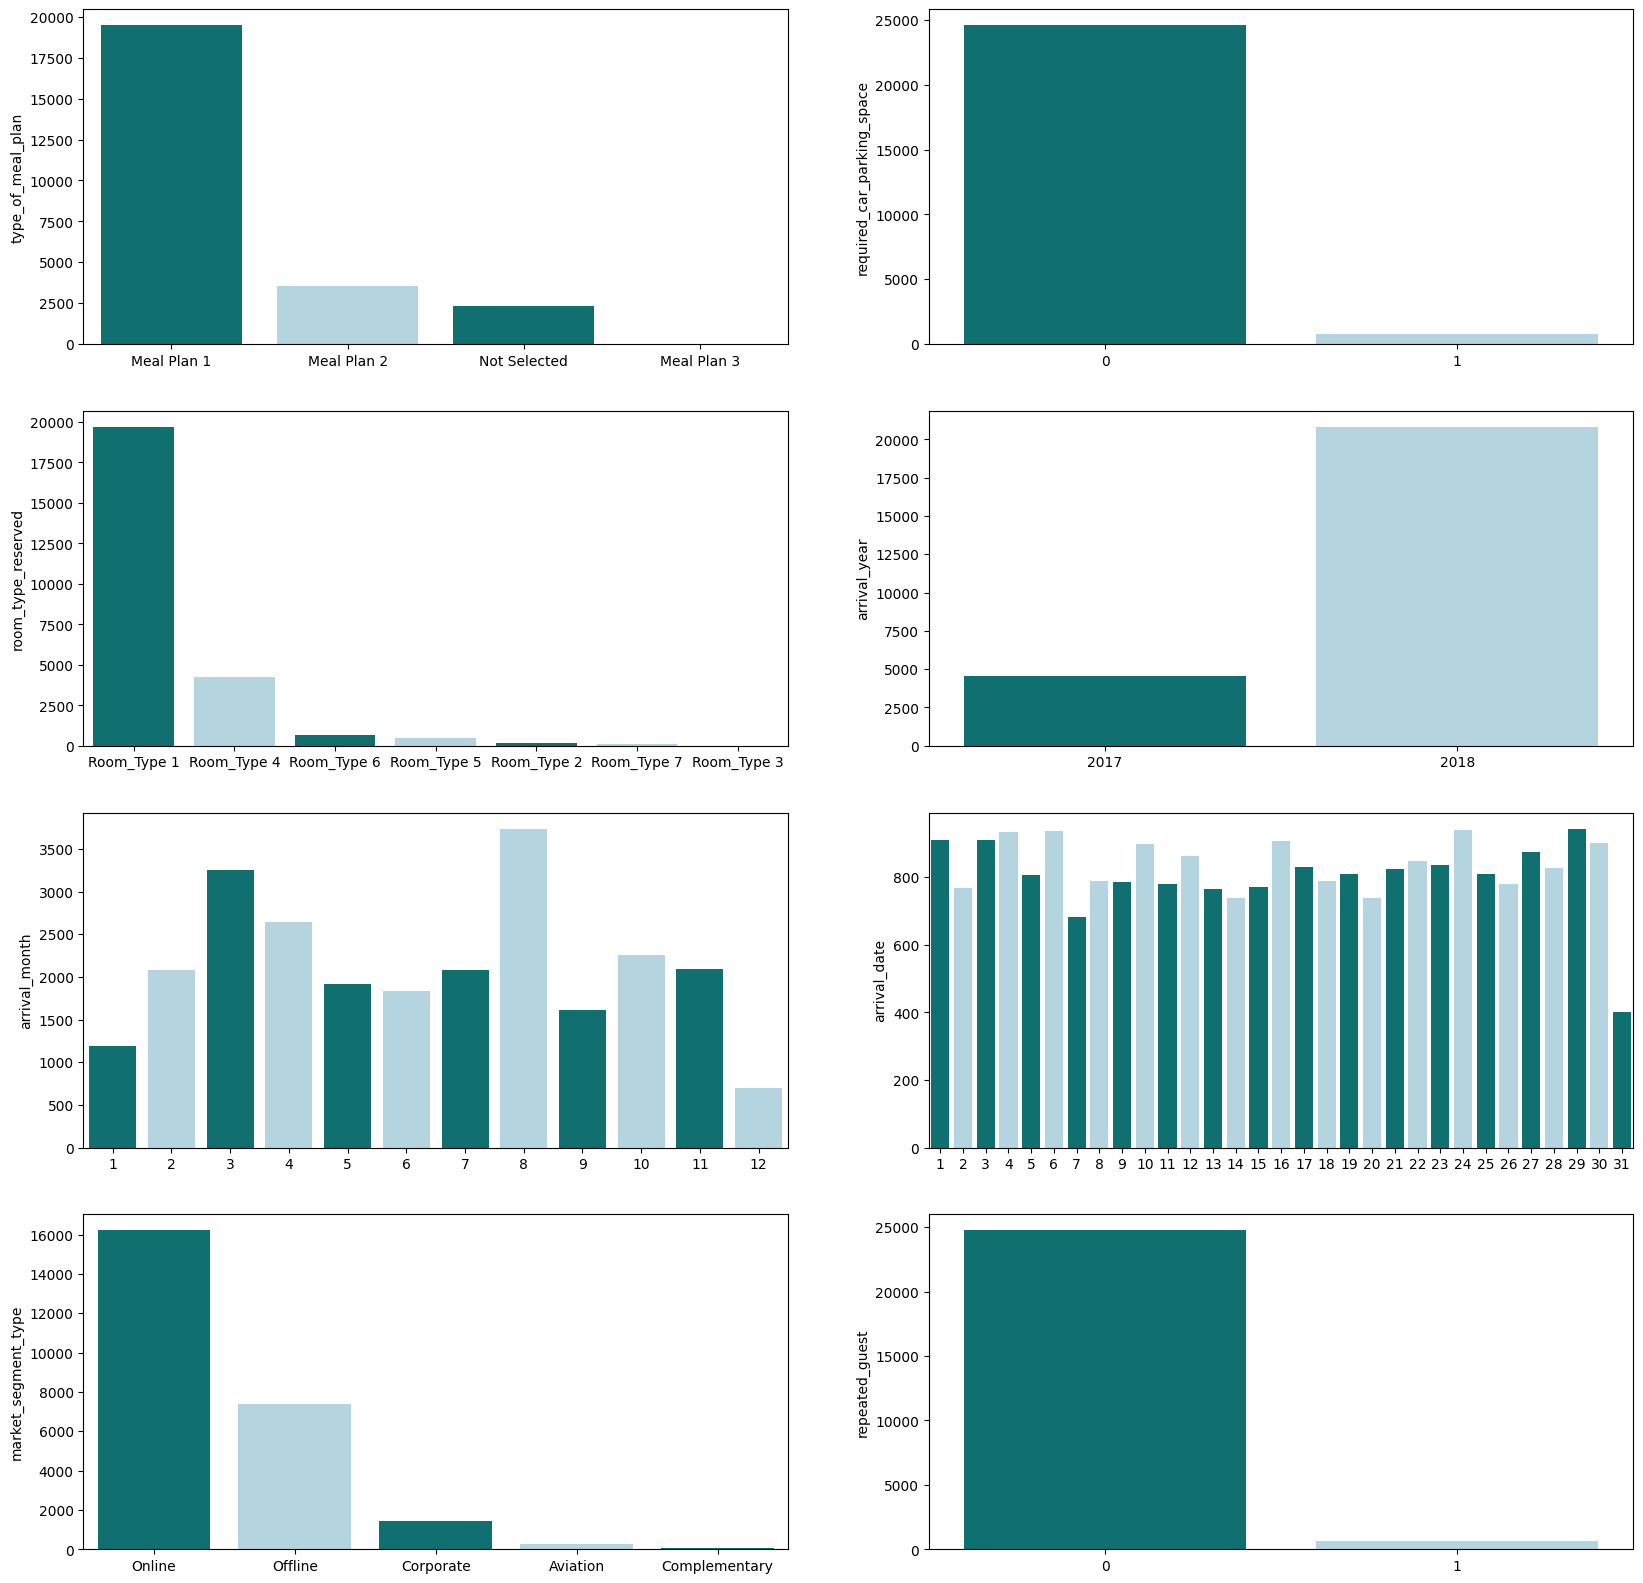

In [ ]:
col_n = 2
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(train_cat.columns[:]):
  sns.barplot(x=train[col].unique(), y=train[col].value_counts(),
              palette=['teal', 'lightblue'], ax=ax[int(i/col_n),int(i%col_n)])

In [ ]:
print(min(train['avg_price_per_room']))
max(train['avg_price_per_room'])

0.0


375.5

In [ ]:
month = pd.DataFrame(train['arrival_month'].value_counts())
month.reset_index(inplace = True)
month.columns = ['month', 'count']
month.head()

,month,count
0,10,3736
1,9,3249
2,8,2644
3,6,2261
4,11,2087


Text(0, 0.5, 'the number of Bookings')

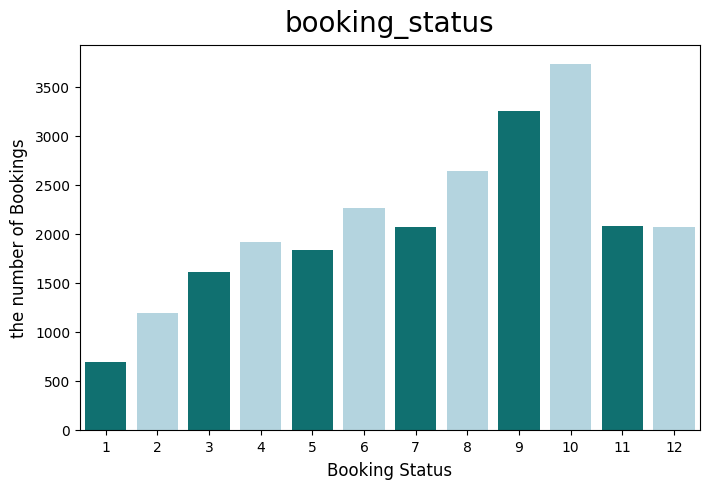

In [ ]:
# Visualizing the percentage of canceled vs not canceled bookings:
plt.figure(figsize=(8,5))
plt.title("booking_status", fontsize = 20, pad = 10)
sns.barplot(x=month['month'], y=month['count'], palette=['teal', 'lightblue'])
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("the number of Bookings", fontsize = 12, labelpad = 5)
#plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled']);

### **(3) Attribute들 간 관계 확인**

In [ ]:
train.corr()

<ipython-input-197-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.024985,0.104761,0.103880,0.016688,0.094154,0.076896,0.018893,0.022791,-0.191838,-0.048887,-0.118662,0.298716,0.185935
no_of_children,-0.024985,1.000000,0.030483,0.028591,0.035034,-0.045204,0.050448,-0.000927,0.029722,-0.035782,-0.016518,-0.021390,0.341905,0.124727
no_of_weekend_nights,0.104761,0.030483,1.000000,0.162928,-0.031480,0.044527,0.054947,-0.014420,0.029703,-0.066552,-0.017950,-0.026200,-0.008610,0.056943
no_of_week_nights,0.103880,0.028591,0.162928,1.000000,-0.054253,0.153668,0.039874,0.036239,-0.006488,-0.097519,-0.029433,-0.043448,0.023334,0.039768
required_car_parking_space,0.016688,0.035034,-0.031480,-0.054253,1.000000,-0.069003,0.022153,-0.014365,-0.000145,0.106731,0.017889,0.057985,0.064757,0.089887
lead_time,0.094154,-0.045204,0.044527,0.153668,-0.069003,1.000000,0.143481,0.133203,0.002148,-0.138447,-0.044684,-0.077897,-0.063740,-0.103470
arrival_year,0.076896,0.050448,0.054947,0.039874,0.022153,0.143481,1.000000,-0.339869,0.021059,-0.017416,0.005565,0.026794,0.180285,0.056148
arrival_month,0.018893,-0.000927,-0.014420,0.036239,-0.014365,0.133203,-0.339869,1.000000,-0.045586,0.006254,-0.035842,-0.003810,0.054267,0.109516
arrival_date,0.022791,0.029722,0.029703,-0.006488,-0.000145,0.002148,0.021059,-0.045586,1.000000,-0.017063,-0.008774,0.000766,0.019245,0.020037
repeated_guest,-0.191838,-0.035782,-0.066552,-0.097519,0.106731,-0.138447,-0.017416,0.006254,-0.017063,1.000000,0.392938,0.534455,-0.174000,-0.009941


In [ ]:
train_numeric = train[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time',
                       'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'no_of_previous_cancellations', 'booking_status']]

In [ ]:
train_numeric.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_previous_cancellations,booking_status
0,2,0,1,3,200,0,90.95,0,0,Canceled
1,2,0,1,3,79,0,90.95,1,0,Canceled
2,2,0,1,4,78,0,99.45,1,0,Not_Canceled
3,2,0,2,0,61,0,91.00,0,0,Not_Canceled
4,2,1,0,4,201,0,82.28,3,0,Not_Canceled


In [ ]:
def change(x):
    if x == 'Canceled':
        return 1
    elif x == 'Not_Canceled':
        return 0

train_numeric['booking_status'] = train_numeric['booking_status'].apply(change)

<ipython-input-200-8ab5266a8eb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numeric['booking_status'] = train_numeric['booking_status'].apply(change)


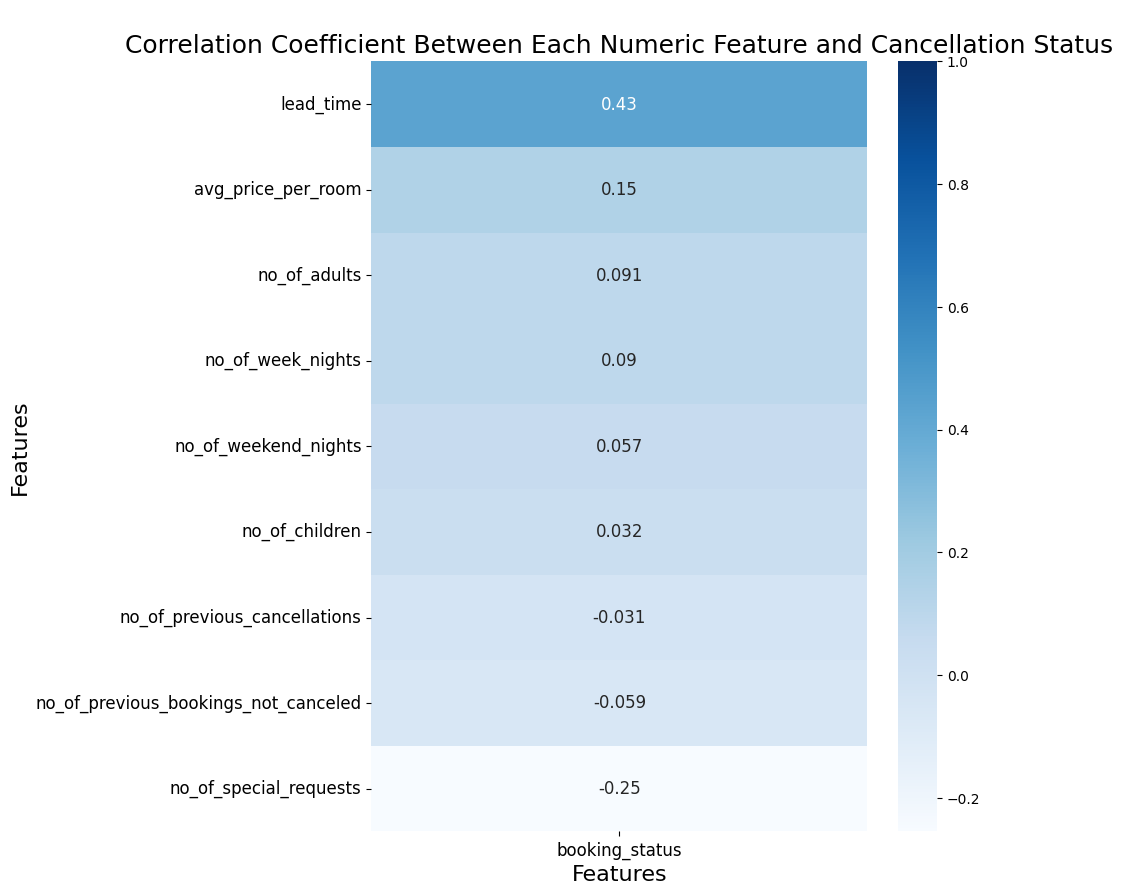

In [ ]:
# Visualizing correlation coefficients between features and cancellation:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(train_numeric.corr()[['booking_status']].sort_values('booking_status', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlation Coefficient Between Each Numeric Feature and Cancellation Status', fontsize=18)
ax.set_xlabel('Features', fontsize = 16)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

### **(4) Categorical attribute 처리 과정**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
var = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest']
for item in var:
    train[item] = lb.fit_transform(train[item])

## **모델에 사용할 attribute들 선정 과정**

In [ ]:
from sklearn.feature_selection import RFECV

X = train.drop("booking_status", axis = 1)
y = train['booking_status']

# 훈련 및 검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeClassifier(random_state=42)
rfecv = RFECV(estimator = model)
X_train_selected = rfecv.fit_transform(X_train, y_train)

selected_features = list(rfecv.get_support(indices=True))
print("Selected Features:", selected_features)

Selected Features: [0, 2, 3, 7, 8, 9, 10, 11, 15, 16]


## **모델 선택 과정**

### **해당 모델의 hyperparameter 선정 과정**

In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import optuna

In [ ]:
X = train.iloc[:, selected_features]
y = train['booking_status']

# 훈련 및 검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 목적 함수 정의
def objective(trial):
    # Decision Tree 하이퍼파라미터 탐색 공간 정의
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Decision Tree 모델 생성 및 훈련
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)

    # 검증 데이터에 대한 예측
    y_pred = model.predict(X_test)

    # 검증 데이터에 대한 정확도를 목적 함수로 사용
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Optuna를 사용하여 하이퍼파라미터 탐색
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 500)

# 최적의 하이퍼파라미터 조합 및 최적의 모델 출력
best_params = study.best_params
best_model = DecisionTreeClassifier(**best_params)
best_model.fit(X_train, y_train)

[I 2023-05-18 08:05:50,658] A new study created in memory with name: no-name-8ea38c82-68da-45dd-bf71-29f4d6d54475
[I 2023-05-18 08:05:50,725] Trial 0 finished with value: 0.82791888166962 and parameters: {'max_depth': 5, 'min_samples_split': 3}. Best is trial 0 with value: 0.82791888166962.
[I 2023-05-18 08:05:50,833] Trial 1 finished with value: 0.8659184878913172 and parameters: {'max_depth': 13, 'min_samples_split': 9}. Best is trial 1 with value: 0.8659184878913172.
[I 2023-05-18 08:05:50,927] Trial 2 finished with value: 0.8657215987399094 and parameters: {'max_depth': 13, 'min_samples_split': 9}. Best is trial 1 with value: 0.8659184878913172.
[I 2023-05-18 08:05:51,014] Trial 3 finished with value: 0.8665091553455405 and parameters: {'max_depth': 11, 'min_samples_split': 3}. Best is trial 3 with value: 0.8665091553455405.
[I 2023-05-18 08:05:51,081] Trial 4 finished with value: 0.8399291199054932 and parameters: {'max_depth': 6, 'min_samples_split': 10}. Best is trial 3 with val

DecisionTreeClassifier(max_depth=11)

In [ ]:
dt_model_op = DecisionTreeClassifier(max_depth=11)
dt_model_op.fit(X_train,y_train)
dt_pred = dt_model_op.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8673


In [ ]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier()
parameters = {'max_depth':[5, 10, 20, 30], 'min_samples_split':[5, 10, 20, 30]}

grid_model = GridSearchCV(dt_model, param_grid=parameters, cv=5, refit=True)
grid_model.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_model.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_model.best_score_))

estimator = grid_model.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 10, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.8635
테스트 데이터 세트 정확도: 0.8641


In [ ]:
test = pd.read_csv("/content/drive/MyDrive/데마분/test.csv")
test.drop('Booking_ID', axis = 1, inplace = True)

lb = LabelEncoder()
var = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest']
for item in var:
    test[item] = lb.fit_transform(test[item])

test = test.iloc[:, selected_features]

prediction_list= dt_model_op.predict(test)

submit = pd.read_csv("/content/drive/MyDrive/데마분/sample_submission.csv")
submit["booking_status"] = prediction_list
submit = submit.replace({'Canceled':1, 'Not_Canceled':0})

submit.to_csv("submit_op.csv",index=False)